In [1]:
import radis
from radis import calc_spectrum, SpectrumFactory, plot_diff
import numpy as np
from scipy.constants import h,c,k,N_A,pi
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
T = 1000
p = 0.1
wstep = 0.001
wmin = 2284
wmax = 2285

sf =   SpectrumFactory(
        wavenum_min=wmin,
        wavenum_max=wmax,
        mole_fraction=1,
        path_length=1,  # doesnt change anything
        wstep=wstep,
        pressure=p,
        isotope="1",
        broadening_max_width = 0,
        chunksize="DLM",
        warnings={
            "MissingSelfBroadeningWarning": "ignore",
            "NegativeEnergiesWarning": "ignore",
            "HighTemperatureWarning": "ignore",
            "GaussianBroadeningWarning": "ignore",
        },
) 

sf._broadening_method = "fft"
sf.load_databank("HITEMP-CO2-TEST")

Using database: HITEMP-CO2-TEST
HITEMP-CO2-TEST 
-------
info : HITEMP-2010, CO2, 3 main isotope (CO2-626, 636, 628), 2283.7-2285.1 cm-1
path : ['/home/pankaj/radis/radis/test/files/cdsd_hitemp_09_fragment.txt']
format : cdsd-hitemp
parfuncfmt : hapi
levelsfmt : radis




/home/pankaj/radis/radis/misc/warning.py:242: OutOfRangeLinesWarning: There are no lines in database in range 2284.00000-2284.00000cm-1 to calculate the effect of neighboring lines. Did you add all lines in the database?
  warnings.warn(WarningType(message))
/home/pankaj/radis/radis/misc/warning.py:242: OutOfRangeLinesWarning: There are no lines in database in range 2285.00093-2285.00093cm-1 to calculate the effect of neighboring lines. Did you add all lines in the database?
  warnings.warn(WarningType(message))


In [3]:
s_dlm = sf.eq_spectrum(Tgas=1000)

Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 1000 K
   Trot                 1000 K
   Tvib                 1000 K
   isotope              1
   mole_fraction        1
   molecule             CO2
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2285.0000 cm-1
   wavenum_min          2284.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  0 cm-1
   cutoff               1e-27 cm-1/(#.cm-2)
   db_assumed_sorted    True
   dbformat             cdsd-hitemp
   dbpath               /home/pankaj/radis/radis/test/files/cdsd_hitemp_09_fragment.txt
   dlm_res_G            0.01
   dlm_res_L            0.01
   include_neighbouring_lines  True
   levelsfmt            radis
   parfuncfmt        

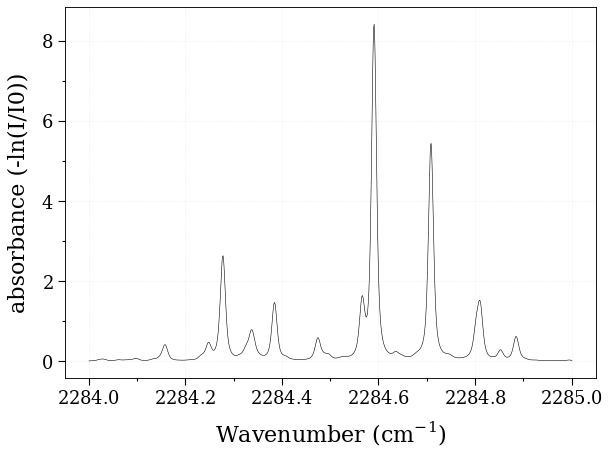

In [4]:
s_dlm.plot('absorbance')

## eq_spectrum saves the scaled df1 dataframe in the hard disk just before computing the spectra, and we load this to compute the spectrum in GPU

In [5]:
df = pd.read_pickle('radis-df1-post-scaling.pkl')

In [7]:
df

,id,iso,wav,int,A,airbrd,selbrd,El,Tdpair,Pshft,...,polyu,wangu,ranku,polyl,wangl,rankl,branch,jl,S,shiftwav
0,2,1,2284.00232,4.870000e-28,2.257000,0.0692,0.0906,4023.1782,0.69,-0.003210,...,8,1,20,5,2,5,0,38,4.525511e-23,2284.002003
2,2,1,2284.00418,4.348000e-40,128.400000,0.0593,0.0632,10763.9728,0.65,-0.004778,...,13,2,31,10,2,11,1,101,4.208913e-25,2284.003708
3,2,1,2284.00484,9.984000e-46,84.090000,0.0551,0.0648,13373.0322,0.62,-0.004957,...,15,1,60,12,1,30,1,114,7.287921e-27,2284.004351
4,2,1,2284.00484,9.978000e-46,84.090000,0.0551,0.0648,13373.0322,0.62,-0.004957,...,15,1,60,12,1,30,1,114,7.283541e-27,2284.004351
7,2,1,2284.00663,8.122000e-34,0.006726,0.0661,0.0662,5716.5550,0.71,-0.002725,...,8,1,12,5,2,1,0,80,2.479654e-26,2284.006361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,2,1,2284.99513,2.596000e-48,136.700000,0.0492,0.0675,14734.4884,0.57,-0.005217,...,14,1,39,11,1,15,1,137,1.999575e-27,2284.994615
1644,2,1,2284.99521,9.276000e-43,28.070000,0.0558,0.0646,11737.1612,0.62,0.000000,...,13,1,37,10,1,16,1,112,2.509320e-26,2284.995210
1645,2,1,2284.99644,3.655000e-34,0.001730,0.0687,0.0876,5458.7715,0.69,-0.001203,...,10,1,28,7,1,9,1,39,4.618893e-27,2284.996321
1648,2,1,2284.99863,5.722000e-37,0.050960,0.0699,0.0920,7431.9488,0.68,-0.002136,...,13,1,56,10,1,25,-1,32,6.188843e-27,2284.998419


### generate the values we need for the answer

In [41]:
v0 = df["shiftwav"].to_numpy().astype(np.float32)          # use the shifted v0 
da = df["Pshft"].to_numpy().astype(np.float32)
na = df["Tdpair"].to_numpy().astype(np.float32)
S0 = df["S"].to_numpy().astype(np.float32)               
El = df["El"].to_numpy().astype(np.float32)

In [42]:
gs = df["selbrd"].to_numpy().astype(np.float32)

In [43]:
log_2gs  = np.log(2*gs)                                      #vector

In [44]:
Mm   = (np.array([44,45,46])* 1e-3 / N_A)[0]
f_ab = np.array([ 0.98420, 0.01106, 0.0039471])[0]
print(Mm, " ", f_ab)

7.306371895564925e-26   0.9842


In [45]:
log_2vMm = np.log(2*v0) + 0.5*np.log(2*k*np.log(2)/(c**2*Mm))#vector

In [46]:
log_2vMm = log_2vMm.astype(np.float32)

In [47]:
log_2gs = log_2gs.astype(np.float32)

In [48]:
len(log_2vMm)

1057

In [49]:
sfGPU = SpectrumFactory(
    wavenum_min=wmin,
    wavenum_max=wmax,
    mole_fraction=1,
    path_length=1,  # doesnt change anything
    wstep=wstep,
    pressure=p
)

In [50]:
df_gpu = pd.DataFrame(
        {
            "wav": v0,
            "Pshft": da,
            "log_2gs": log_2gs,
            "Tdpair": na,
            "log_2vMm": log_2vMm,
            "int": S0,
            "El": El,
        }
)

In [51]:
df_gpu

,wav,Pshft,log_2gs,Tdpair,log_2vMm,int,El
0,2284.001953,-0.003210,-1.708154,0.69,-8.307672,4.525511e-23,4023.178223
1,2284.003662,-0.004778,-2.068304,0.65,-8.307671,4.208913e-25,10763.972656
2,2284.004395,-0.004957,-2.043303,0.62,-8.307670,7.287921e-27,13373.032227
3,2284.004395,-0.004957,-2.043303,0.62,-8.307670,7.283541e-27,13373.032227
4,2284.006348,-0.002725,-2.021928,0.71,-8.307670,2.479654e-26,5716.555176
...,...,...,...,...,...,...,...
1052,2284.994629,-0.005217,-2.002481,0.57,-8.307237,1.999575e-27,14734.488281
1053,2284.995117,0.000000,-2.046394,0.62,-8.307237,2.509320e-26,11737.161133
1054,2284.996338,-0.001203,-1.741827,0.69,-8.307236,4.618893e-27,5458.771484
1055,2284.998535,-0.002136,-1.692820,0.68,-8.307235,6.188843e-27,7431.948730


In [52]:
sfGPU.df0 = df_gpu

In [53]:
s_gpu = sfGPU.eq_spectrum_gpu(pressure = 0.1, Tgas = 1000)

Initializing parameters... 
Spectral points per block  : 256
Threads per block          : 1024
Spectral points per thread : 0

Initializing Lorentzian parameters  (from cache)... 
Done!
Initializing Gaussian parameters (from cache)... 
Done!
Number of lines loaded: 1057

Allocating device memory and copying data...
Copying init_params to device...
Done!
Copying spectral data to device...
Initialization done!
done!
Calculating spectra... Copying iteration parameters to device...
Done!
Getting ready...
<<<LAUNCHED>>>  Performing Fourier transform... done!
Applying lineshapes... done!
Performing inverse Fourier transform... done!
[rG = 0.017867094350809687% rL = 9.383432707831796%] Runtime: 0.15775999426841736 + 3.4634560644626617 = 3.621216058731079 ms
Finished calculating spectrum!
done!


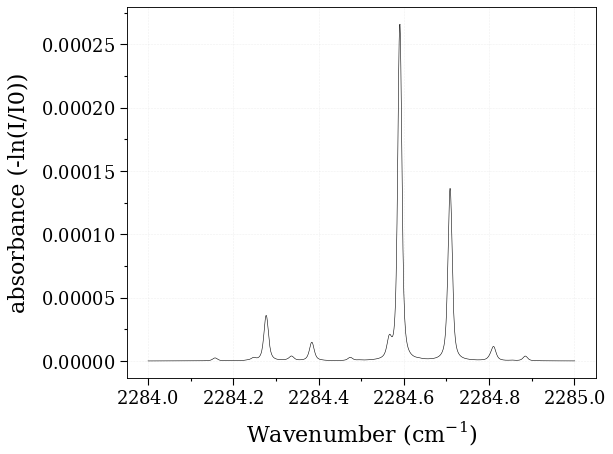

In [54]:
s_gpu.plot('absorbance')

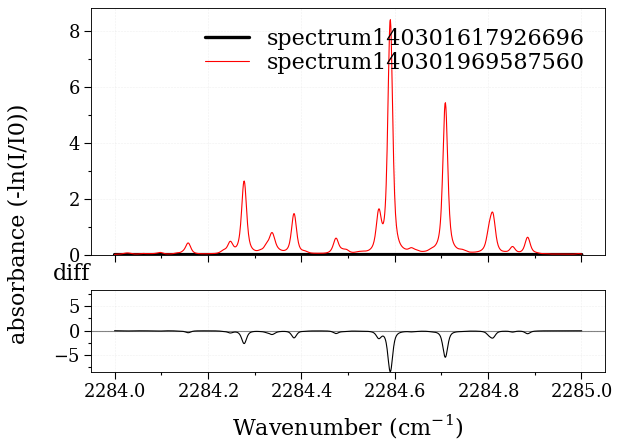

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9a601977b8>])

In [55]:
plot_diff(s_gpu, s_dlm, var = 'absorbance')